<style>
/* Réduire la largeur uniquement pour les cellules Markdown, alignées à gauche */
.jp-MarkdownCell,
div.text_cell_render {
    max-width: 50% !important;
    margin-left: 0 !important;
    margin-right: 0 !important;
}

/* Les cellules code et les outputs restent en pleine largeur */
.jp-CodeCell,
div.input,
div.output_area {
    max-width: 60% !important;
}
</style>


# Projet de Machine Learning for Data Science
Auteurs :
@Lilou Masson  & @Paul Hamann-Cossart

## Table des matières
1. [Introduction et sélection des données](#intro)  
1.1 [Le jeu de données](#11)  
1.2 [Motivations](#12)  
1.3 [Idées de problématiques avec l'IA](#13)  
1.4 [Analyse critique](#14)  
1.5 [Choix de la problématique](#15)
2. [Exploration](#explo)  
2.1 [Caractéristiques de l'accident](#21)  
2.2 [Véhicules impliqués](#22)

In [1]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

<a id="intro"></a>
## 1. Introduction et sélection des données
<a id="11"></a>
### 1.1 Le jeu de données
<div style="text-align: justify;">
La sécurité routière constitue un enjeu majeur de santé publique en France. Chaque année, plusieurs milliers d’accidents corporels sont recensés par les forces de l’ordre et centralisés dans le fichier national des accidents corporels de la circulation, dit "Fichier BAAC" (Bulletin d’analyse des accidents corporels) administré par l’ONISR (Observatoire national interministériel de la sécurité routière).  
</div>
  
Ces données sont désormais disponibles en open data pour chaque année de 2005 à 2024, sous la forme de 4 tables :  
- <b>Caractéristiques</b> : décrit les circonstances générales de l’accident
- <b>Lieux</b> : décrit le lieu principal de l'accident même si celui-ci s'est déroulé à une intersection
- <b>Véhicules</b> impliqués
- <b>Usagers</b> impliqués

<a id="12"></a>
### 1.2 Motivations 
Les données du fichier BAAC :
- sont publiques, fiables et officielles
- offrent une multitude de problématiques de machine learning dû à leur richesse
- ont 20 ans d'historique
- sont faiblement exploitées dans le cadre du machine learning : la plupart des études réalisées sont descriptives ou statistiques  

<a id="13"></a>
### 1.3 Exploration d'idées de problématiques avec l'IA (ChatGPT)
1. Prédire la niveau de gravité des blessures des usagers impliqués dans l'accident : indemne, blessé léger, blessé hospitalisé, tué (<i>classification multi-classe</i>)
2. Prédire si l'accident fera au moins un blessé grave (<i>classification binaire</i>)
3. Prédire si l'accident impliquera un piéton (<i>classification binaire</i>)
4. Prédire si l'accident impliquera un deux-roues motorisé (<i>classification binaire</i>)
5. Prédire si l'accident se produit en agglomération (<i>classification binaire</i>)
6. Prédire le type de collision (<i>classification multi-classe</i>)
7. Prédire la manoeuvre du conducteur avant l'accident (<i>classification multi-classe</i>)
8. Prédire l'état de la surface de la route (<i>classification multi-classe</i>)
9. Prédire la présence d'un véhicule en fuite (<i>classification binaire</i>)
10. Prédire si l'accident a lieu la nuit (<i>classficiation binaire</i>)
11. Prédire si l'accident a lieu dans des conditions météo dégradées (<i>classification binaire</i>)
12. Prédire la catégorie du véhicule impliqué dans l'accident (<i>classification multi-classe</i>)
13. Prédire le nombre de véhicules impliqués dans l'accident (<i>régression</i>)

<a id="14"></a>
### 1.4 Analyse critique des propositions faites par l'IA
<div style="text-align: justify;">  
L'IA a proposé une dizaine de problématiques, toutes concentrées sur les accidents entre véhicules motorisés ou entre véhicules motorisés et piétons. Certaines propositions sont pertinentes, mais nous souhaitons orienter notre analyse vers la sécurité des cyclistes, un mode de déplacement en forte expansion ces dernières années.
</div>

<a id="15"></a>
### 1.5 Choix de la problématique 
<div style="text-align: justify;">  
L’usage du vélo, qu'il soit à assistance électrique ou non, connaît une croissance importante en France sous l’effet des politiques de mobilité douce, du développement des pistes cyclables et de l’évolution des habitudes de déplacement. Cependant, cette expansion s’accompagne d’enjeux majeurs en matière de sécurité routière : les infrastructures urbaines ont longtemps été pensées pour les automobiles et doivent désormais être repensées pour garantir la sécurité des cyclistes, particulièrement vulnérables en cas d’accident.
</div>  

Dans la table vehicules, nous avons à notre disposition la variable catv :  
- 01 = bicyclette, 
- 80 = vélo à assistance électrique (VAE)    

<div style="text-align: justify;">
Notre premier choix de problématique portait sur l’identification des zones à risque pour les cyclistes, c’est-à-dire la prédiction des lieux où la probabilité d’accident grave serait élevée en fonction du type de route, du profil de la voie, de l’intersection, de la présence ou non d’aménagements cyclables, ainsi que des conditions de circulation. Cette approche est particulièrement pertinente pour la sécurité routière, car elle permettrait de repérer les infrastructures les plus dangereuses et d’orienter les décisions d’aménagement. Toutefois, sa mise en œuvre est nettement plus complexe : elle implique de travailler avec les coordonnées géographiques, de regrouper les accidents par zones, d’extraire et fusionner finement les quatre tables BAAC, et éventuellement d’intégrer des données externes (réseau cyclable, cartographie, typologie des voies). En comparaison, la prédiction de la gravité des blessures d’un cycliste lors d’un accident constitue une tâche supervisée plus directe, mieux adaptée au cadre d’un projet de Machine Learning classique, tout en restant très pertinente pour analyser les facteurs de risque. C’est pourquoi nous avons retenu cette seconde approche pour la suite du projet.
</div>


<a id="explo"></a>
## 2. Exploration et traitement des données

In [11]:
from extract import extract_data

caract, lieux, usagers, vehicules = extract_data("DATA")

\\ad.univ-lille.fr\Etudiants\Homedir-etu\225193\Documents\M2\ML_for_DS\PROJET\extract.py:22: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(chemin_fichier, sep=';')
\\ad.univ-lille.fr\Etudiants\Homedir-etu\225193\Documents\M2\ML_for_DS\PROJET\extract.py:22: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(chemin_fichier, sep=';')


In [12]:
print(f'caract : {caract.shape[0]} lignes, {caract.shape[1]} colonnes - {caract['Num_Acc'].nunique()} accidents uniques')
print(f'usagers : {usagers.shape[0]} lignes, {usagers.shape[1]} colonnes - {usagers['id_usager'].nunique()} usagés uniques')
print(f'vehicules : {vehicules.shape[0]} lignes, {vehicules.shape[1]} colonnes - {vehicules['id_vehicule'].nunique()} véhicules uniques')   
print(f'lieux : {lieux.shape[0]} lignes, {lieux.shape[1]} colonnes - {lieux['Num_Acc'].nunique()} accidents uniques') 

caract : 221044 lignes, 16 colonnes - 221044 accidents uniques
usagers : 506886 lignes, 17 colonnes - 506886 usagés uniques
vehicules : 378071 lignes, 12 colonnes - 378071 véhicules uniques
lieux : 252928 lignes, 19 colonnes - 221044 accidents uniques


In [10]:
caract.loc[caract['Num_Acc'].isnull()]

,Accident_Id,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long,annee,Num_Acc
0,2.022000e+11,19,10,2022,16:15,1,26,26198,2,3,1,3,TEIL(vieille route du),"44,5594200000","4,7257200000",2022,NaN
1,2.022000e+11,20,10,2022,08:34,1,25,25204,2,3,1,3,Miranda,"46,9258100000","6,3462000000",2022,NaN
2,2.022000e+11,20,10,2022,17:15,1,22,22360,2,6,1,2,ROND POINT DE BREZILLET,"48,4931620000","-2,7604390000",2022,NaN
3,2.022000e+11,20,10,2022,18:00,1,16,16102,2,3,8,6,LOHMEYER (RUE),"45,6926520000","-0,3262900000",2022,NaN
4,2.022000e+11,19,10,2022,11:45,1,13,13103,1,1,1,2,ROUTE DE JEAN MOULIN-RN 538,"43,6755790366","5,0927031775",2022,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55297,2.022001e+11,1,1,2022,03:50,3,2B,2B293,1,1,1,6,D71,"42,3101650000","9,4785830000",2022,NaN
55298,2.022001e+11,1,1,2022,07:20,3,84,84074,1,1,1,6,D973,"43,7531640000","5,2244760000",2022,NaN
55299,2.022001e+11,1,1,2022,04:27,3,74,74001,1,1,9,6,D22,"46,2825320000","6,7328060000",2022,NaN
55300,2.022001e+11,1,1,2022,08:40,1,81,81099,1,3,1,3,Chemin Toulze,"43,9272650000","1,9156370000",2022,NaN


<a id="21"></a>
### 2.1 Caractéristiques de l'accident

Caractéristiques : 
- Num_Acc : numéro d'identifiant de l'accident 
- jour : numéro du jour 
- mois : numéro du mois 
- an : année 
- hrmn : heure de l'accident au format hh:mm => création de deux colonnes heure et minute 
- lum : conditions d'éclairage 
- dep : code INSEE du département
- com : code INSEE de la commune
- agg : localisation hors/en agglomération
- int : type d'intersection
- atm : conditions atmosphériques
- col : type de collision
- adr : adresse (pour les accidents survenus en agglomération)
- lat : latitude
- long : longitude

In [35]:
# suppression de la colonne hrmn en la scindant en deux colonnes heure et minute
caract['heure'] = caract['hrmn'].str.split(':').str[0].astype(int)
caract['minute'] = caract['hrmn'].str.split(':').str[1].astype(int)
caract = caract.drop(columns=['hrmn'])
# conversion des colonnes lat et long en float
caract['lat'] = caract['lat'].str.replace(',', '.', regex=False).astype(float)
caract['long'] = caract['long'].str.replace(',', '.', regex=False).astype(float)

In [36]:
# Mettre les libellés des variables catégorielles
agg_map = {1: 'Hors agglomération', 2: 'En agglomération'}
lum_map = {1: 'Plein jour', 2: 'Crépuscule ou aube', 3: 'Nuit sans éclairage public', 
           4: 'Nuit avec éclairage public non allumé', 5: 'Nuit avec éclairage public allumé'}
atm_map = {-1: 'NR', 1: 'Normale', 2: 'Pluie légère', 3: 'Pluie forte', 4: 'Neige - grêle', 
           5: 'Brouillard - fumée', 6: 'Vent fort - tempête', 7: 'Temps éblouissant', 
           8: 'Temps couvert', 9: 'Autre'}
col_map = {-1: 'NR', 1: 'Deux véhicules - frontale', 2: "Deux véhicules - par l'arrière", 
           3: 'Deux véhicules - par le côté', 4: 'Trois véhicules et plus - en chaîne', 
           5: 'Trois véhicules et plus - collisions multiples', 6: 'Autre collision', 
           7: 'Sans collision'}
col_int = {1: 'Hors intersection', 2: 'Intersection en X', 3: 'Intersection en T', 
           4: 'Intersection en Y', 5: 'Intersection à plus de 4 branches', 6: 'Giratoire', 
           7: 'Place', 8: 'Passage à niveau', 9: 'Autre'}
caract['agg'] = caract['agg'].map(agg_map)
caract['lum'] = caract['lum'].map(lum_map)
caract['atm'] = caract['atm'].map(atm_map)
caract['col'] = caract['col'].map(col_map)
caract['int'] = caract['int'].map(col_int)

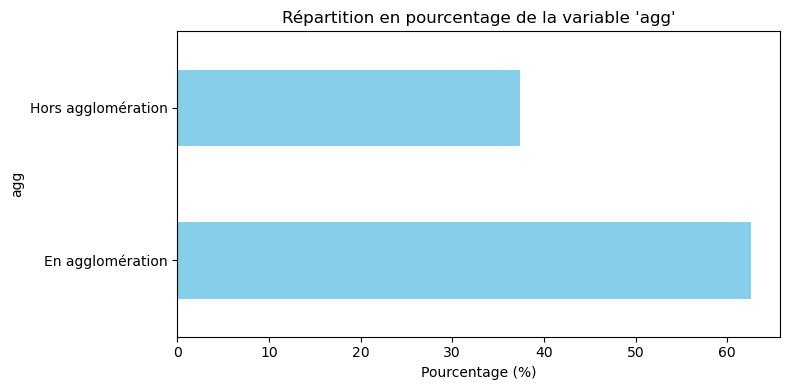

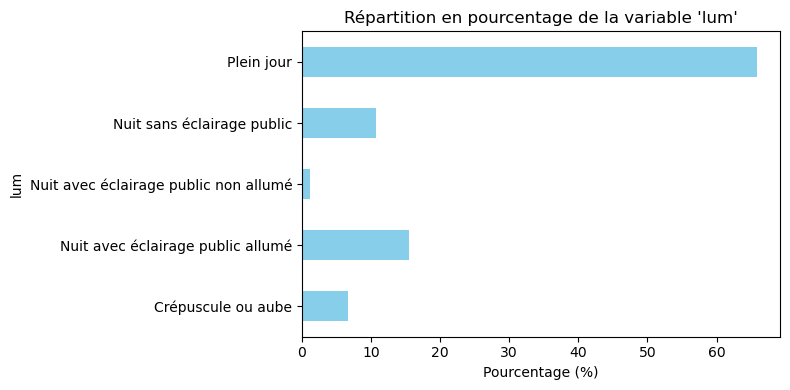

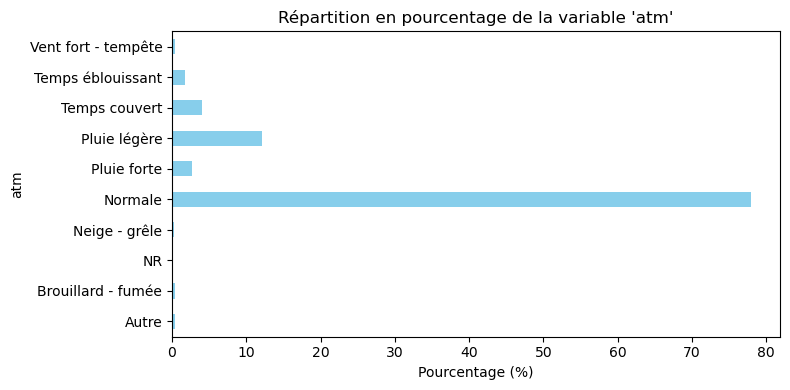

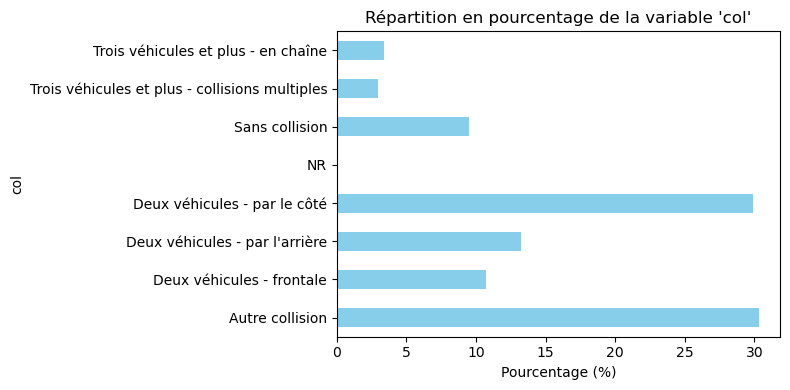

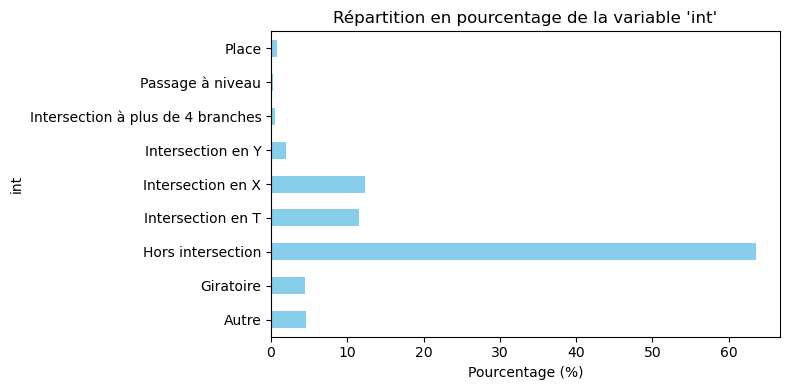

In [37]:
# Visualisation de la répartition des variables catégorielles
for col in ['agg', 'lum', 'atm', 'col', 'int']:
    plt.figure(figsize=(8,4))
    
    caract[col].value_counts(normalize=True).sort_index().mul(100).plot(kind='barh', color='skyblue')
   
    plt.title(f"Répartition en pourcentage de la variable '{col}'")
    plt.xlabel('Pourcentage (%)')
    plt.ylabel(col)
    plt.tight_layout()
    
    plt.show()

<a id="22"></a>
### 2.2 Véhicules impliqués

Véhicules :  
- Num_Acc : numéro identifiant l'accident
- id_vehicule : identifiant unique du véhicule (code numérique) 
- Num_Veh : identifiant unique du véhicule (code alphanumérique)
- senc : sens de circulation
- catv : catégorie du véhicule
- obs : obstacle fixe heurté
- obsm : obstacle mobile heurté
- choc : point de choc initial
- manv : manoeuvre principale avant l'accident
- motor : type de motorisation du véhicule
- occutc : nombre d'occupants dans le transport en commun

In [89]:
vehicules['id_vehicule'] = vehicules['id_vehicule'].str.replace('\xa0', '', regex=False)

In [51]:
senc_map = {
    -1: "Non renseigné",
     0: "Inconnu",
     1: "PK/PR croissant",
     2: "PK/PR décroissant",
     3: "Absence de repère",
     8: "Non défini"
}
catv_map = {
     0: "Indéterminable",
     1: "Bicyclette",
     2: "Cyclomoteur <50cm3",
     3: "Voiturette",
     4: "Scooter immatriculé (inutilisé)",
     5: "Motocyclette (inutilisé)",
     6: "Side-car (inutilisé)",
     7: "VL seul",
     8: "VL + caravane (inutilisé)",
     9: "VL + remorque (inutilisé)",
    10: "VU seul 1,5T–3,5T",
    11: "VU + caravane (inutilisé)",
    12: "VU + remorque (inutilisé)",
    13: "PL seul 3,5T–7,5T",
    14: "PL seul > 7,5T",
    15: "PL > 3,5T + remorque",
    16: "Tracteur routier",
    17: "Tracteur + semi-remorque",
    18: "Transport en commun (inutilisé)",
    19: "Tramway (inutilisé)",
    20: "Engin spécial",
    21: "Tracteur agricole",
    30: "Scooter <50 cm3",
    31: "Moto 50–125 cm3",
    32: "Scooter >50–125 cm3",
    33: "Moto >125 cm3",
    34: "Scooter >125 cm3",
    35: "Quad léger <= 50 cm3",
    36: "Quad lourd > 50 cm3",
    37: "Autobus",
    38: "Autocar",
    39: "Train",
    40: "Tramway",
    41: "3RM <= 50 cm3",
    42: "3RM > 50 cm3 <= 125 cm3",
    43: "3RM > 125 cm3",
    50: "EDP à moteur",
    60: "EDP sans moteur",
    80: "VAE",
    99: "Autre véhicule",
    -1: "Non renseigné"
}
obs_map = {
   -1: "Non renseigné",
    0: "Sans objet",
    1: "Véhicule en stationnement",
    2: "Arbre",
    3: "Glissière métallique",
    4: "Glissière béton",
    5: "Autre glissière",
    6: "Bâtiment / mur / pile de pont",
    7: "Support signalisation / borne d'urgence",
    8: "Poteau",
    9: "Mobilier urbain",
   10: "Parapet",
   11: "Îlot / refuge / borne haute",
   12: "Bordure de trottoir",
   13: "Fossé / talus / paroi rocheuse",
   14: "Autre obstacle sur chaussée",
   15: "Autre obstacle sur trottoir/accotement",
   16: "Sortie de chaussée sans obstacle",
   17: "Buse / tête d’aqueduc",
}
obsm_map = {
    -1: "Non renseigné",
     0: "Aucun",
     1: "Piéton",
     2: "Véhicule",
     4: "Véhicule sur rail",
     5: "Animal domestique",
     6: "Animal sauvage",
     9: "Autre"
}
choc_map = {
   -1: "Non renseigné",
    0: "Aucun",
    1: "Avant",
    2: "Avant droit",
    3: "Avant gauche",
    4: "Arrière",
    5: "Arrière droit",
    6: "Arrière gauche",
    7: "Côté droit",
    8: "Côté gauche",
    9: "Chocs multiples (tonneaux)"
}
manv_map = {
   -1: "Non renseigné",
    0: "Inconnue",
    1: "Sans changement de direction",
    2: "Même sens, même file",
    3: "Entre deux files",
    4: "Marche arrière",
    5: "À contresens",
    6: "Franchissement terre-plein central",
    7: "Couloir bus (même sens)",
    8: "Couloir bus (sens inverse)",
    9: "Insertion",
   10: "Demi-tour",
   11: "Changement de file gauche",
   12: "Changement de file droite",
   13: "Déporté gauche",
   14: "Déporté droite",
   15: "Tournant à gauche",
   16: "Tournant à droite",
   17: "Dépassement à gauche",
   18: "Dépassement à droite",
   19: "Traversée de chaussée",
   20: "Stationnement",
   21: "Évitement",
   22: "Ouverture de porte",
   23: "Arrêté hors stationnement",
   24: "En stationnement (occupants)",
   25: "Circulation sur trottoir",
   26: "Autre manœuvre"
}
motor_map = {
   -1: "Non renseigné",
    0: "Inconnue",
    1: "Hydrocarbures",
    2: "Hybride électrique",
    3: "Électrique",
    4: "Hydrogène",
    5: "Humaine",
    6: "Autre"
}

maps = {
    "senc": senc_map,
    "catv": catv_map,
    "obs": obs_map,
    "obsm": obsm_map,
    "choc": choc_map,
    "manv": manv_map,
    "motor": motor_map
}

for col, mapping in maps.items():
    if col in vehicules.columns:
        vehicules[col] = vehicules[col].map(mapping)

In [85]:
print(f"{round(vehicules.loc[vehicules['catv'] == 'Bicyclette']['Num_Acc'].nunique() / caract['Num_Acc'].nunique()*100, 2)}% des accidents de 2023 impliquent un vélo")
print(f"{round(vehicules.loc[vehicules['catv'] == 'VAE']['Num_Acc'].nunique() / caract['Num_Acc'].nunique()*100, 2)}% des accidents de 2023 impliquent un VAE")
print(f"{vehicules.loc[vehicules['catv'].isin(['Bicyclette', 'VAE'])]['Num_Acc'].nunique()} accidents impliquant un vélo/VAE en 2023")


8.93% des accidents de 2023 impliquent un vélo
1.37% des accidents de 2023 impliquent un VAE
5618 accidents impliquant un vélo/VAE en 2023


In [90]:
caract_velo = caract.loc[caract['Num_Acc'].isin(vehicules.loc[vehicules['catv'].isin(['Bicyclette', 'VAE'])]['Num_Acc'].unique())]

In [91]:
caract_velo

,Num_Acc,jour,mois,an,lum,dep,com,agg,int,atm,col,adr,lat,long,heure,minute
16,202300000017,7,5,2023,Nuit avec éclairage public allumé,92,92007,En agglomération,Autre,Pluie légère,Deux véhicules - par le côté,VERDUN (RUE DE) N° PAIRS,48.802023,2.318006,21,40
24,202300000025,6,5,2023,Plein jour,67,67465,En agglomération,Hors intersection,Normale,Deux véhicules - par le côté,17 rue albert fuchs,48.799910,7.983214,10,10
25,202300000026,7,5,2023,Plein jour,56,56234,Hors agglomération,Hors intersection,Normale,Sans collision,Avenue de Saint Malo,47.541813,-3.134907,16,30
32,202300000033,7,5,2023,Plein jour,29,29105,En agglomération,Hors intersection,Normale,Deux véhicules - par le côté,Rue du Général de Gaulle,48.509735,-4.075059,12,30
41,202300000042,5,5,2023,Plein jour,17,17218,En agglomération,Hors intersection,Normale,Autre collision,41 Rue des Moulins,46.307338,-0.998664,12,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54736,202300054737,7,5,2023,Plein jour,07,07070,Hors agglomération,Hors intersection,Pluie légère,Sans collision,SAINT ROMAINS DE LERPS (ROUTE DE),44.967690,4.842850,10,30
54740,202300054741,7,5,2023,Plein jour,07,07316,Hors agglomération,Hors intersection,Pluie légère,Autre collision,LONES (PONT DES),44.912870,4.862540,15,15
54756,202300054757,10,6,2023,Plein jour,10,10199,En agglomération,Intersection en T,Normale,Deux véhicules - par le côté,Rue du Docteur Gerdy,48.065655,4.504555,12,0
54759,202300054760,12,7,2023,Plein jour,77,77221,En agglomération,Hors intersection,Normale,Deux véhicules - frontale,D217B,48.854978,2.701694,10,0


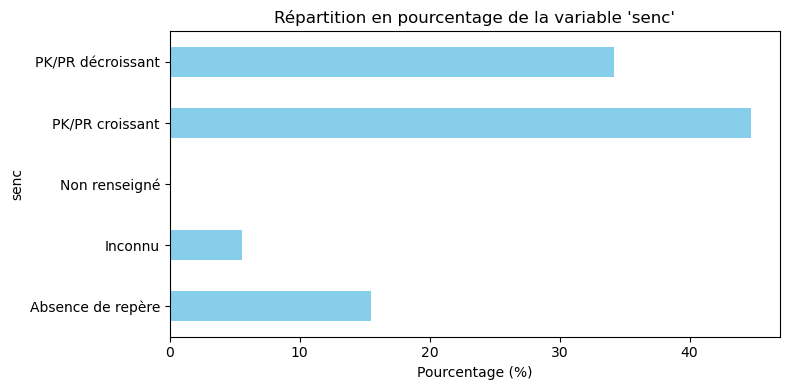

<Figure size 800x400 with 0 Axes>

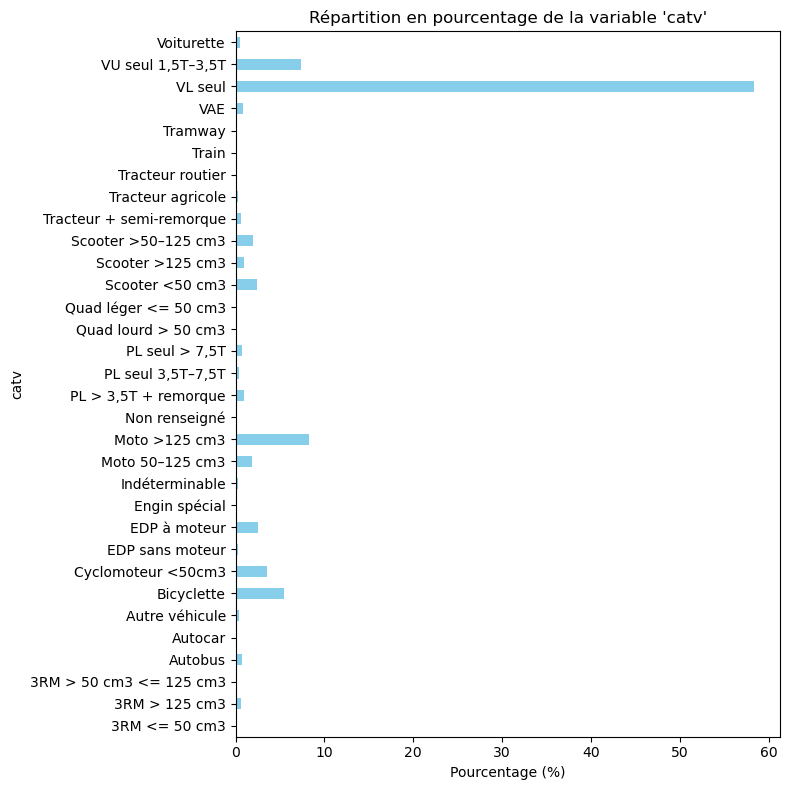

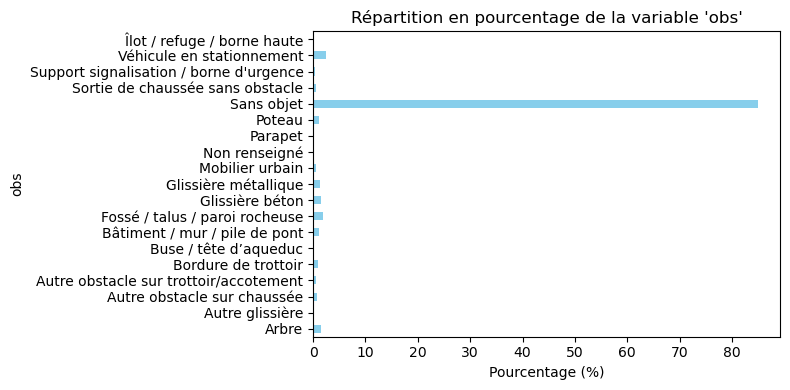

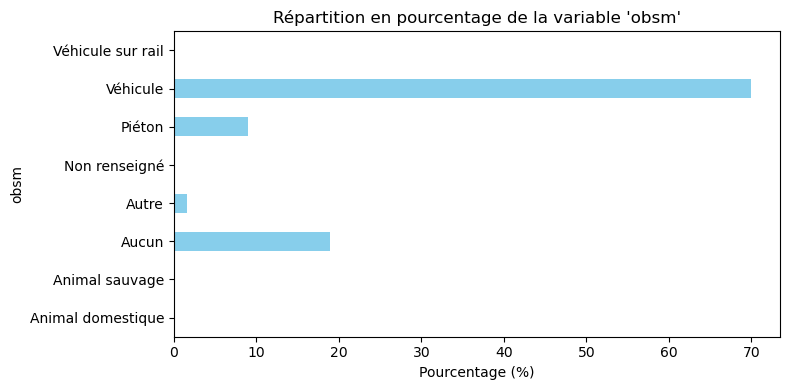

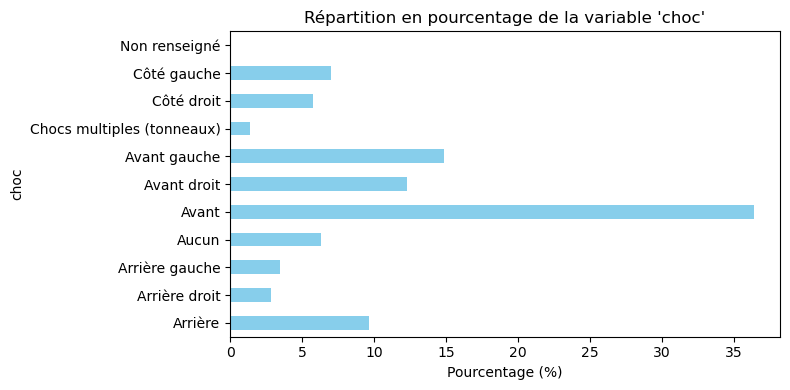

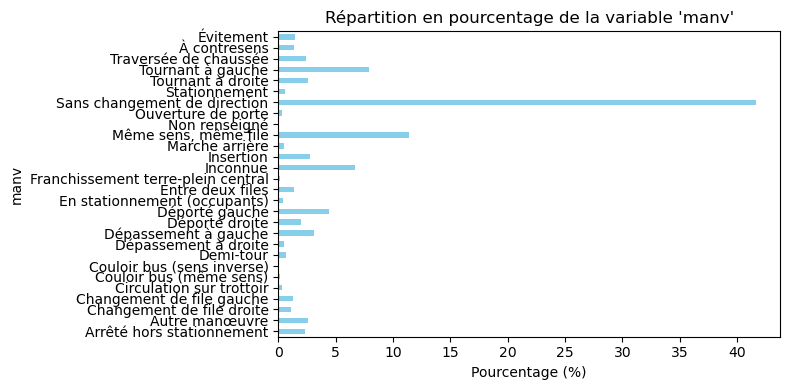

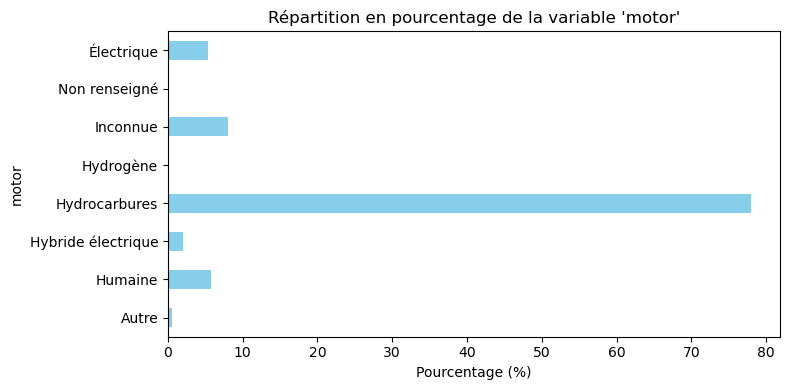

In [60]:
# Visualisation de la répartition des variables catégorielles
for col in maps.keys():
    plt.figure(figsize=(8,4))
    if col == 'catv':
        plt.figure(figsize=(8,8))
    
    vehicules[col].value_counts(normalize=True).sort_index().mul(100).plot(kind='barh', color='skyblue')
   
    plt.title(f"Répartition en pourcentage de la variable '{col}'")
    plt.xlabel('Pourcentage (%)')
    plt.ylabel(col)
    plt.tight_layout()
    
    plt.show()

In [52]:
vehicules

,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
0,202300000001,155 680 557,A01,PK/PR croissant,Scooter <50 cm3,Sans objet,Aucun,Arrière droit,Sans changement de direction,Hydrocarbures,NaN
1,202300000002,155 680 556,A01,PK/PR décroissant,VL seul,Sans objet,Piéton,Avant,Sans changement de direction,Hydrocarbures,NaN
2,202300000003,155 680 554,B01,PK/PR croissant,Cyclomoteur <50cm3,Sans objet,Véhicule,Avant,Tournant à droite,Hydrocarbures,NaN
3,202300000003,155 680 555,A01,PK/PR décroissant,VL seul,Sans objet,Véhicule,Avant droit,Tournant à gauche,Hydrocarbures,NaN
4,202300000004,155 680 551,B01,PK/PR croissant,VL seul,Sans objet,Véhicule,Chocs multiples (tonneaux),"Même sens, même file",Hydrogène,NaN
...,...,...,...,...,...,...,...,...,...,...,...
93580,202300054820,155 583 348,A01,Absence de repère,VL seul,Sans objet,Autre,Arrière,Autre manœuvre,Hydrocarbures,NaN
93581,202300054821,155 583 346,A01,PK/PR croissant,Scooter <50 cm3,Sans objet,Véhicule,Avant gauche,Insertion,Hydrocarbures,NaN
93582,202300054821,155 583 347,B01,PK/PR croissant,VL seul,Sans objet,Véhicule,Avant droit,Insertion,Hydrocarbures,NaN
93583,202300054822,155 583 344,A01,PK/PR décroissant,VL seul,Sans objet,Véhicule,Côté droit,Ouverture de porte,Hydrocarbures,NaN


In [25]:
# lartpc : regex pour remplacer les virgules par des points et convertir en float
lieux['lartpc'] = lieux['lartpc'].str.replace(',', '.', regex=False).astype(float)

# id_vehicule : regex pour enlever les caractères \xa0
vehicules['id_vehicule'] = vehicules['id_vehicule'].str.replace('\xa0', '', regex=False)